# Tensorflow DNN - overview

## import package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

## prepare dataset examples

In [2]:
simpson_img = pd.read_csv('simpson_preproc/simpson_img_list.csv')
print(simpson_img.head())

  classname                         img
0       c34  marge_simpson/pic_0601.jpg
1       c34  marge_simpson/pic_0180.jpg
2       c34  marge_simpson/pic_0196.jpg
3       c34  marge_simpson/pic_0698.jpg
4       c34  marge_simpson/pic_0083.jpg


## plot image example

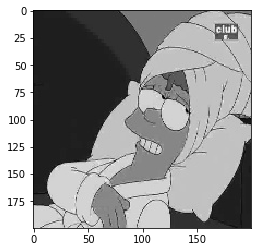

In [3]:
img = cv2.imread('simpson_preproc/' + simpson_img.img.iloc[0], 0)
plt.imshow(img, cmap="gray")

## filter data

In [4]:
simpson_img = simpson_img[simpson_img.img.str.contains('simpson')]

## transform y to one-hot encoder format

In [5]:
simpson_y = pd.get_dummies(simpson_img['classname'], '').as_matrix()
print(simpson_y)

[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 ..., 
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


## information of training data

In [6]:
x_train_list, y_train = simpson_img, simpson_y

## record the dim of img ##
img = cv2.resize(img, (50,50))
img = img.flatten()

print('input_data shape: training {training_shape}'.format(
            training_shape=(len(x_train_list), img.shape[0])))
print('y_true shape: training {training_shape}'.format(
            training_shape=y_train.shape))

input_data shape: training (7274, 2500)
y_true shape: training (7274, 6)


## define image generator

In [7]:
from sklearn.utils import shuffle 

def simpson_train_batch_generator(x, y, bs, shape):
    x_train = np.array([]).reshape((0, shape))
    y_train = np.array([]).reshape((0, y.shape[1]))
    while True:
        new_ind = shuffle(range(len(x)))
        x = x.take(new_ind)
        y = np.take(y, new_ind, axis=0)
        for i in range(len(x)):
            dir_img = 'simpson_preproc/' + x.img.iloc[i]
            img = cv2.imread(dir_img, 0)
            img = cv2.resize(img, (50,50))
            x_train = np.row_stack([x_train, img.flatten()])
            y_train = np.row_stack([y_train, y[i]])
            if x_train.shape[0] == bs:
                x_batch = x_train.copy()
                x_batch /= 255.
                y_batch = y_train.copy()
                x_train = np.array([]).reshape((0 ,shape))
                y_train = np.array([]).reshape((0 ,y.shape[1]))        
                yield x_batch, y_batch

# create graph & run session experiment

In [8]:
tf.reset_default_graph() ## 重新 build graph 需要跑這行